# Определение перспективного тарифа для телеком компании
Компания «Мегалайн» — федерального оператора сотовой связи, предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. Есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


Шаг 1. Изучение данных
    
Шаг 2. Подготовка данных
    
Шаг 3. Анализ данных
    
Шаг 4. Проверка гипотез
    
Шаг 5. Общий вывод

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

# Шаг 1. Изучение данных

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
display(calls.info())
display(calls.head(10))
display(calls.tail(10))
display(calls.sample(10))
display(calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


,id,call_date,duration,user_id
194585,1477_333,2018-08-06,0.00,1477
3983,1011_77,2018-05-04,14.47,1011
47203,1118_492,2018-05-17,11.55,1118
126487,1324_620,2018-10-01,3.11,1324
180829,1453_21,2018-09-18,1.47,1453
32822,1081_67,2018-05-04,0.00,1081
84981,1213_27,2018-10-28,4.98,1213
41925,1102_352,2018-07-11,3.11,1102
171056,1423_27,2018-12-10,0.00,1423
108728,1281_161,2018-09-12,0.00,1281


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице calls нет пропущенных значений.

Нужно поменять тип данных в столбце call_date на datetime.

In [4]:
display(internet.info())
display(internet.head(10))
display(internet.tail(10))
display(internet.sample(10))
display(internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


,Unnamed: 0,id,mb_used,session_date,user_id
126633,126633,1425_162,80.79,2018-11-19,1425
26586,26586,1092_252,851.85,2018-12-11,1092
144126,144126,1481_480,393.98,2018-05-24,1481
23767,23767,1081_62,528.78,2018-12-06,1081
52245,52245,1176_400,709.71,2018-08-08,1176
117727,117727,1395_411,65.25,2018-09-20,1395
142466,142466,1477_363,443.40,2018-06-22,1477
123466,123466,1415_74,317.23,2018-08-26,1415
24886,24886,1086_93,214.51,2018-07-30,1086
14229,14229,1050_56,399.68,2018-09-08,1050


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В таблице internet нет пропущённых значений.

Первый столбец очень похож на столбец странный, возможно, его лучше удалить.

Тип данных в столбце session_date нужно изменить на datetime.

In [5]:
display(messages.info())
display(messages.head(10))
display(messages.tail(10))
display(messages.sample(10))
display(messages.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


,id,message_date,user_id
19643,1087_41,2018-11-10,1087
12911,1054_467,2018-08-10,1054
118894,1482_456,2018-04-10,1482
70279,1300_31,2018-10-25,1300
55044,1244_210,2018-12-19,1244
74703,1315_284,2018-12-09,1315
95218,1392_58,2018-04-29,1392
116751,1474_137,2018-12-23,1474
59359,1259_226,2018-11-25,1259
110915,1449_256,2018-09-10,1449


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


В таблице messages нет пропущенных значений.

Тип данных в столбце message_date нужно изменить на datetime.

In [6]:
display(tariffs.info())
display(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице tariffs нет пропущенных значений.

Тип данных менять не нужно.

Ошибок в описании тарифов нет.

In [7]:
display(users.info())
display(users.head(10))
display(users.tail(10))
display(users.sample(10))
display(users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
315,1315,49,NaN,Владивосток,Инга,Агапеева,2018-07-14,smart
303,1303,36,NaN,Смоленск,Алевтина,Абакшина,2018-07-25,ultra
408,1408,53,NaN,Самара,Касьян,Кукушкин,2018-05-27,smart
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
226,1226,19,NaN,Новосибирск,Альбин,Бобылёв,2018-06-01,ultra
244,1244,68,NaN,Москва,Геральд,Макеев,2018-05-09,smart
415,1415,41,NaN,Москва,Андрей,Лукин,2018-06-29,ultra
57,1057,43,NaN,Москва,Динара,Дьячкова,2018-03-12,ultra
75,1075,25,NaN,Екатеринбург,Рафаэль,Никулин,2018-11-02,smart
143,1143,64,NaN,Пермь,Арсен,Покровский,2018-04-27,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В таблице users есть пропущенные значения в столбце churn_date. Эти пропуски возникли, потому что тариф ещё действовал на момент выгрузки.

Нужно изменить тип данных в столбце reg_date на datetime.

In [8]:
users['city'] = users['city'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()

In [9]:
calls.duplicated().sum()
internet.duplicated().sum()
messages.duplicated().sum()
users.duplicated().sum()

0

Дубликатов нет.

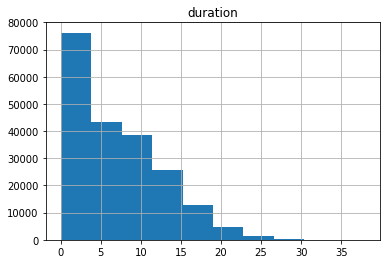

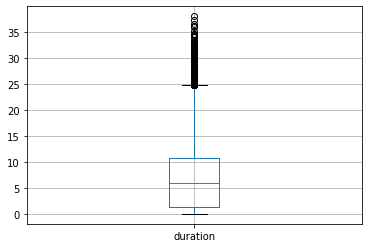

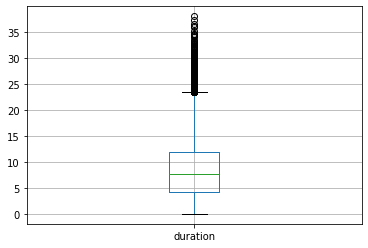

In [10]:
calls.hist(column='duration')
plt.show()
calls.boxplot(column='duration')
plt.show()
calls.query('duration != 0').boxplot(column='duration')
plt.show()

In [11]:
calls.query('duration == 0').groupby('user_id')['call_date'].count().sort_values(ascending=False).head(10)

user_id
1377    336
1168    308
1453    295
1375    290
1196    262
1021    254
1363    244
1282    240
1057    216
1458    214
Name: call_date, dtype: int64

In [12]:
internet.query('mb_used == 0').groupby('user_id')['session_date'].count().sort_values(ascending=False).head(10)

user_id
1204    144
1496    141
1429    125
1119    124
1227    121
1314    117
1219    115
1135    115
1045    113
1337    112
Name: session_date, dtype: int64

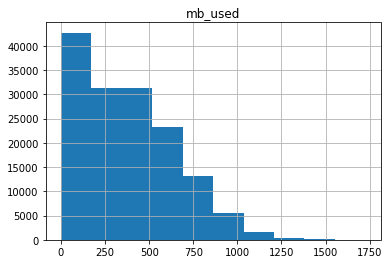

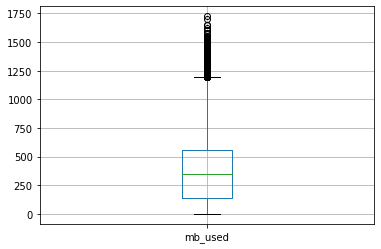

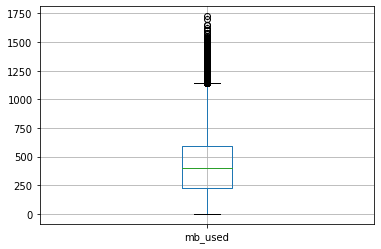

In [13]:
internet.hist(column='mb_used')
plt.show()
internet.boxplot(column='mb_used')
plt.show()
internet.query('mb_used != 0').boxplot(column='mb_used')
plt.show()

Звонки с нулевой продолжительностью - это пропущенные звонки, их не нужно удалять. Если убрать нулевые звонки, распредление практически не меняется. С использованием интернета то же самое.

# Шаг 2. Подготовка данных

In [14]:
pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

0     2018-05-25
1     2018-11-01
2     2018-06-17
3     2018-08-17
4     2018-05-14
         ...    
495   2018-08-28
496   2018-01-27
497   2018-10-09
498   2018-07-19
499   2018-09-27
Name: reg_date, Length: 500, dtype: datetime64[ns]

Тип данных изменён.

In [15]:
internet['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

In [16]:
internet = internet[['id', 'mb_used', 'session_date', 'user_id']]
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [17]:
calls['duration'] = calls['duration'].apply(math.ceil)

In [18]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
users_tariffs = calls.merge(users, on='user_id', how='left')
counts = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
counts.columns = ['calls_duration', 'calls_counts']
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
counts['messages_counts'] = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
counts['mb_used'] = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
counts['tariff'] = users_tariffs.pivot_table(index=['user_id', 'month'], values='tariff', aggfunc='first')
counts['city'] = users_tariffs.pivot_table(index=['user_id', 'month'], values='city', aggfunc='first')
counts

calls_duration  calls_counts  messages_counts   mb_used tariff  \
user_id month                                                                   
1000    5                 159            22             22.0   2253.49  ultra   
        6                 172            43             60.0  23233.77  ultra   
        7                 340            47             75.0  14003.64  ultra   
        8                 408            52             81.0  14055.93  ultra   
        9                 466            58             57.0  14568.91  ultra   
...                       ...           ...              ...       ...    ...   
1498    10                247            41             42.0  20579.36  smart   
1499    9                  70             9             11.0   1845.75  smart   
        10                449            68             48.0  17788.51  smart   
        11                612            74             59.0  17963.31  smart   
        12                492            69             66.0  13055.58  smart   

                      city  
user_id month               
1000    5        краснодар  
        6        краснодар  
        7        краснодар  
        8        краснодар  
        9        краснодар  
...                    ...  
1498    10     владикавказ  
1499    9            пермь  
        10           пермь  
        11           пермь  
        12           пермь  

[3174 rows x 6 columns]

In [19]:
counts['gb_used'] = counts['mb_used'] / 1024

Мегабайты переведены в гигабайты. Мегабайты из таблицы с тарифами переведены в гигабайты внутри функции.

In [20]:
def proceeds(data):
    if data['tariff'] == 'smart':
        if data['calls_duration'] > tariffs.loc[0,'minutes_included']:
            exclim_min = data['calls_duration'] - tariffs.loc[0, 'minutes_included']
        else:
            exclim_min = 0
        if data['messages_counts'] > tariffs.loc[0,'messages_included']:
            exclim_mes = data['messages_counts'] - tariffs.loc[0,'messages_included'] 
        else:
            exclim_mes = 0
        if data['mb_used'] > tariffs.loc[0,'mb_per_month_included']:
            exclim_gb = math.ceil(data['gb_used']) - (tariffs.loc[0,'mb_per_month_included'] / 1000)
        else:
            exclim_gb = 0
        proceeds = exclim_min * tariffs.loc[0,'rub_per_minute'] + exclim_mes * tariffs.loc[0,'rub_per_message'] + exclim_gb * 1000 * tariffs.loc[0,'rub_per_gb'] + tariffs.loc[0,'rub_monthly_fee']
    else:
        if data['calls_duration'] > tariffs.loc[1, 'minutes_included']:
            exclim_min = data['calls_duration'] - tariffs.loc[1, 'minutes_included']
        else:
            exclim_min = 0
        if data['messages_counts'] > tariffs.loc[1,'messages_included']: 
            exclim_mes = data['messages_counts'] - tariffs.loc[1,'messages_included'] 
        else:
            exclim_mes = 0
        if data['mb_used'] > tariffs.loc[1,'mb_per_month_included']:
            exclim_gb = math.ceil(data['gb_used']) - (tariffs.loc[1,'mb_per_month_included'] / 1000)
        else:
            exclim_gb = 0
        proceeds = exclim_min * tariffs.loc[1,'rub_per_minute'] + exclim_mes * tariffs.loc[1,'rub_per_message'] + exclim_gb * 1000 * tariffs.loc[1,'rub_per_gb'] + tariffs.loc[1,'rub_monthly_fee']
    return proceeds

In [21]:
counts['proceeds'] = counts.apply(proceeds, axis=1)
counts

calls_duration  calls_counts  messages_counts   mb_used tariff  \
user_id month                                                                   
1000    5                 159            22             22.0   2253.49  ultra   
        6                 172            43             60.0  23233.77  ultra   
        7                 340            47             75.0  14003.64  ultra   
        8                 408            52             81.0  14055.93  ultra   
        9                 466            58             57.0  14568.91  ultra   
...                       ...           ...              ...       ...    ...   
1498    10                247            41             42.0  20579.36  smart   
1499    9                  70             9             11.0   1845.75  smart   
        10                449            68             48.0  17788.51  smart   
        11                612            74             59.0  17963.31  smart   
        12                492            69             66.0  13055.58  smart   

                      city   gb_used   proceeds  
user_id month                                    
1000    5        краснодар   2.25349     1950.0  
        6        краснодар  23.23377     1950.0  
        7        краснодар  14.00364     1950.0  
        8        краснодар  14.05593     1950.0  
        9        краснодар  14.56891     1950.0  
...                    ...       ...        ...  
1498    10     владикавказ  20.57936  1128550.0  
1499    9            пермь   1.84575      550.0  
        10           пермь  17.78851   528550.0  
        11           пермь  17.96331   528913.0  
        12           пермь  13.05558      598.0  

[3174 rows x 8 columns]

In [22]:
counts.reset_index(inplace=True)

# Шаг 3. Анализ данных

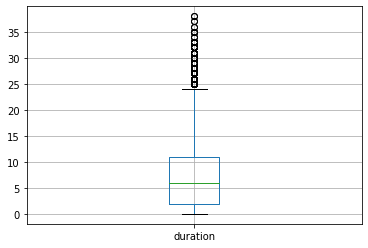

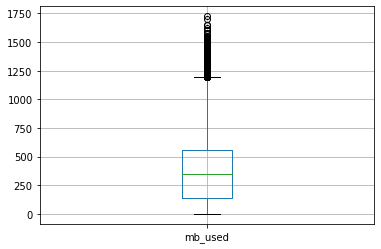

In [23]:
calls.boxplot(column='duration')
plt.show()
internet.boxplot(column='mb_used')
plt.show()

Сильных выбросов в данных о длительности звонков и использовании интернета нет. 

После округления длительности звонков распеределение изменилось.

In [24]:
calls_stat = counts.pivot_table(index=['tariff', 'month'], values=['calls_duration', 'calls_counts'], aggfunc='mean')
calls_stat['cc_var'] = counts.groupby(['tariff', 'month'])['calls_counts'].var(ddof=1)
calls_stat['cc_std'] = np.sqrt(calls_stat['cc_var'])
calls_stat['cd_var'] = counts.groupby(['tariff', 'month'])['calls_duration'].var(ddof=1)
calls_stat['cd_std'] = np.sqrt(calls_stat['cd_var'])
mb_stat = counts.pivot_table(index=['tariff', 'month'], values=['mb_used'], aggfunc='mean')
mb_stat['mb_var'] = counts.groupby(['tariff', 'month'])['mb_used'].var(ddof=1)
mb_stat['mb_std'] = np.sqrt(mb_stat['mb_var'])
messages_stat = counts.pivot_table(index=['tariff', 'month'], values=['messages_counts'], aggfunc='mean')
messages_stat['messages_var'] = counts.groupby(['tariff', 'month'])['messages_counts'].var(ddof=1)
messages_stat['messages_std'] = np.sqrt(messages_stat['messages_var'])
display(calls_stat)
display(mb_stat)
display(messages_stat)

calls_counts  calls_duration       cc_var     cc_std  \
tariff month                                                         
smart  1         27.676471      203.852941   433.134581  20.811886   
       2         40.189655      298.689655   644.858137  25.394057   
       3         54.324675      390.051948   652.116883  25.536579   
       4         51.312500      367.133929   660.739302  25.704850   
       5         55.241135      387.361702   643.984296  25.376846   
       6         55.889571      398.067485   554.592668  23.549791   
       7         56.726368      408.353234   606.619751  24.629652   
       8         59.230769      423.269231   622.667547  24.953307   
       9         59.776062      430.266409   613.515549  24.769246   
       10        60.167235      427.590444   629.749334  25.094807   
       11        61.698413      436.647619   604.962896  24.595993   
       12        66.684524      479.985119   707.273312  26.594611   
ultra  1         59.444444      428.111111  1733.777778  41.638657   
       2         41.541667      297.125000  1678.693841  40.971866   
       3         67.675676      489.648649  2010.447447  44.838013   
       4         66.509434      475.301887  1202.293179  34.674100   
       5         75.906250      534.250000  1505.927579  38.806283   
       6         69.209877      497.469136  1470.542901  38.347658   
       7         78.363636      564.397727  1698.486938  41.212704   
       8         74.058252      530.611650  1762.663240  41.984083   
       9         77.288288      558.882883  1831.352498  42.794305   
       10        80.652542      581.728814  1896.074823  43.543941   
       11        78.031008      562.364341  1655.217781  40.684368   
       12        86.425373      614.925373  2141.208675  46.273196   

                     cd_var      cd_std  
tariff month                             
smart  1       23787.341355  154.231454  
       2       36412.287961  190.820041  
       3       36823.155161  191.893604  
       4       34778.207127  186.489161  
       5       34820.061094  186.601343  
       6       29960.520109  173.091075  
       7       32250.269602  179.583601  
       8       34177.270551  184.870956  
       9       32950.529526  181.522807  
       10      34889.530319  186.787393  
       11      31100.611101  176.353653  
       12      39131.447539  197.816702  
ultra  1       72769.361111  269.757968  
       2       87919.679348  296.512528  
       3      111384.900901  333.743765  
       4       66036.830189  256.976322  
       5       74881.015873  273.643958  
       6       86019.652160  293.291071  
       7       86952.587121  294.877241  
       8       91169.553588  301.942964  
       9       98597.904341  314.003032  
       10      97140.336086  311.673445  
       11      88449.624031  297.404815  
       12     107981.031983  328.604674

mb_used        mb_var        mb_std
tariff month                                          
smart  1       8513.717647  4.153391e+07   6444.681014
       2      11597.054310  3.902943e+07   6247.353833
       3      15104.159091  3.396835e+07   5828.237537
       4      13462.180625  3.247004e+07   5698.249092
       5      15805.184326  3.573925e+07   5978.231725
       6      15815.210982  3.367473e+07   5802.993301
       7      15743.150348  3.477643e+07   5897.154446
       8      16705.874077  3.022531e+07   5497.754779
       9      16300.093398  2.710110e+07   5205.871476
       10     16747.558669  3.442298e+07   5867.109828
       11     16893.805016  2.860821e+07   5348.664238
       12     18116.016667  3.115680e+07   5581.827542
ultra  1      13140.681111  4.713299e+07   6865.346875
       2      12846.477273  1.096922e+08  10473.403015
       3      17535.550270  1.199416e+08  10951.785885
       4      17397.983396  8.892813e+07   9430.171389
       5      19987.237778  9.849093e+07   9924.259566
       6      19145.200625  8.417380e+07   9174.627992
       7      20682.044368  1.002920e+08  10014.589840
       8      19783.962745  1.088943e+08  10435.241538
       9      19268.012818  8.876733e+07   9421.641423
       10     20245.913504  9.564828e+07   9779.994093
       11     19794.127656  9.676281e+07   9836.808899
       12     21857.015338  1.050832e+08  10251.010672

messages_counts  messages_var  messages_std
tariff month                                             
smart  1            20.000000    252.133333     15.878707
       2            27.940000    440.465714     20.987275
       3            35.550725    669.780477     25.880117
       4            35.864583    517.865680     22.756662
       5            39.032787    638.775776     25.274014
       6            38.510638    736.223100     27.133431
       7            38.988506    719.352468     26.820747
       8            38.857143    768.657709     27.724677
       9            39.252252    705.447393     26.560260
       10           39.154150    738.122969     27.168419
       11           39.955390    712.535316     26.693357
       12           42.290210    835.182149     28.899518
ultra  1            43.428571    765.285714     27.663798
       2            32.937500    713.395833     26.709471
       3            47.800000   1826.666667     42.739521
       4            45.447368   1411.334993     37.567739
       5            49.448980   1639.419218     40.489742
       6            50.687500   1658.440476     40.723955
       7            60.942857   1931.619876     43.950198
       8            58.690476   1899.348824     43.581519
       9            63.197802   1767.982662     42.047386
       10           70.397959   2326.159583     48.230277
       11           66.888889   2163.632399     46.514862
       12           72.687500   2249.964527     47.433791

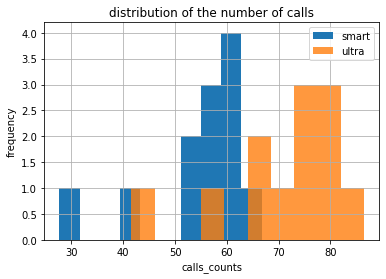

In [25]:
fig, ax = plt.subplots()
calls_stat.query('tariff == "smart"')['calls_counts'].hist(label='smart')
calls_stat.query('tariff == "ultra"')['calls_counts'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of the number of calls')
ax.legend()
ax.set_xlabel('calls_counts')
ax.set_ylabel('frequency');

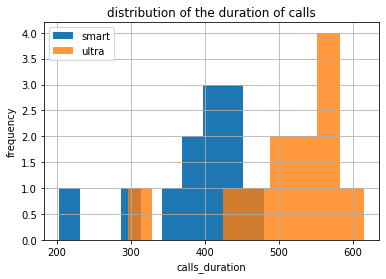

In [26]:
fig, ax = plt.subplots()
calls_stat.query('tariff == "smart"')['calls_duration'].hist(label='smart')
calls_stat.query('tariff == "ultra"')['calls_duration'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of the duration of calls')
ax.legend()
ax.set_xlabel('calls_duration')
ax.set_ylabel('frequency');

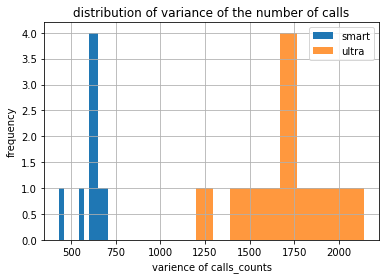

In [27]:
fig, ax = plt.subplots()
calls_stat.query('tariff == "smart"')['cc_var'].hist(label='smart')
calls_stat.query('tariff == "ultra"')['cc_var'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of variance of the number of calls')
ax.legend()
ax.set_xlabel('varience of calls_counts')
ax.set_ylabel('frequency');

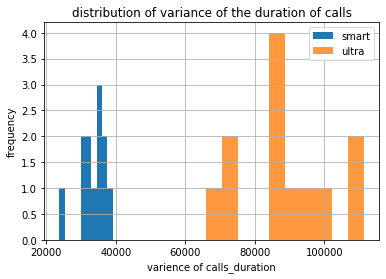

In [28]:
fig, ax = plt.subplots()
calls_stat.query('tariff == "smart"')['cd_var'].hist(label='smart')
calls_stat.query('tariff == "ultra"')['cd_var'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of variance of the duration of calls')
ax.legend()
ax.set_xlabel('varience of calls_duration')
ax.set_ylabel('frequency');

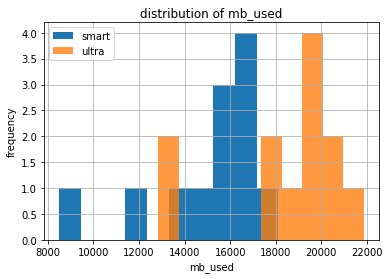

In [29]:
fig, ax = plt.subplots()
mb_stat.query('tariff == "smart"')['mb_used'].hist(label='smart')
mb_stat.query('tariff == "ultra"')['mb_used'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of mb_used')
ax.legend()
ax.set_xlabel('mb_used')
ax.set_ylabel('frequency');

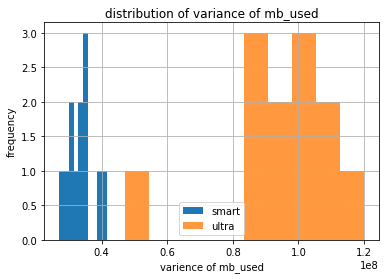

In [30]:
fig, ax = plt.subplots()
mb_stat.query('tariff == "smart"')['mb_var'].hist(label='smart')
mb_stat.query('tariff == "ultra"')['mb_var'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of variance of mb_used')
ax.legend()
ax.set_xlabel('varience of mb_used')
ax.set_ylabel('frequency');

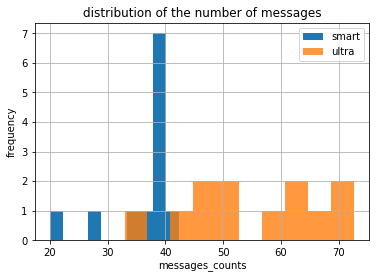

In [31]:
fig, ax = plt.subplots()
messages_stat.query('tariff == "smart"')['messages_counts'].hist(label='smart')
messages_stat.query('tariff == "ultra"')['messages_counts'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of the number of messages')
ax.legend()
ax.set_xlabel('messages_counts')
ax.set_ylabel('frequency');

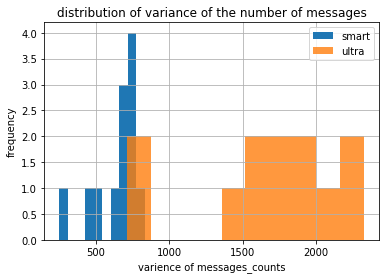

In [32]:
fig, ax = plt.subplots()
messages_stat.query('tariff == "smart"')['messages_var'].hist(label='smart')
messages_stat.query('tariff == "ultra"')['messages_var'].hist(alpha=0.8, label='ultra')
ax.set_title('distribution of variance of the number of messages')
ax.legend()
ax.set_xlabel('varience of messages_counts')
ax.set_ylabel('frequency');

Распределения по звонкам и использованию интернету похоже у обоих тарифов, но в тарифе ultra все значения больше. Распределения дисперсии по использованию интернета различается. Распределения по сообщениям различаются.

In [33]:
calls_stat.reset_index(inplace=True)
mb_stat.reset_index(inplace=True)
messages_stat.reset_index(inplace=True)

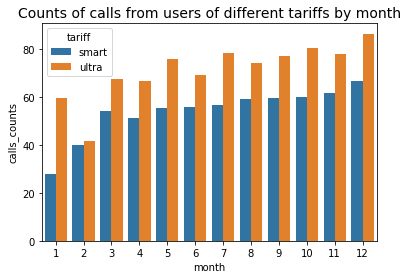

In [34]:
ax_calls = sns.barplot(x='month', y='calls_counts', hue='tariff', data=calls_stat)
ax_calls.axes.set_title("Counts of calls from users of different tariffs by month", fontsize=14);

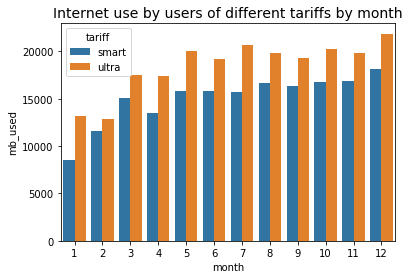

In [35]:
ax_mb = sns.barplot(x='month', y='mb_used', hue='tariff', data=mb_stat)
ax_mb.axes.set_title("Internet use by users of different tariffs by month", fontsize=14);

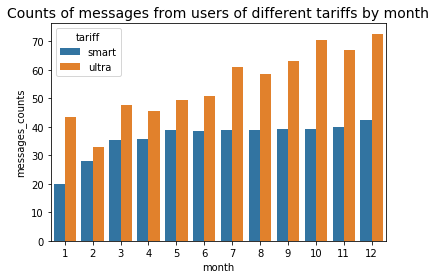

In [36]:
ax_calls = sns.barplot(x='month', y='messages_counts', hue='tariff', data=messages_stat)
ax_calls.axes.set_title("Counts of messages from users of different tariffs by month", fontsize=14);

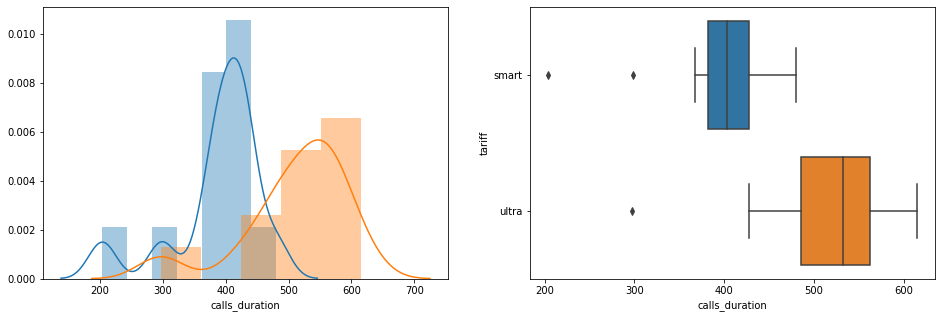

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(calls_stat.query('tariff == "smart"')['calls_duration'], ax=axes[0])
sns.distplot(calls_stat.query('tariff == "ultra"')['calls_duration'], ax=axes[0])
sns.boxplot(x = calls_stat['calls_duration'], y=calls_stat['tariff'], ax=axes[1]);

Суммарная средная продолжительность звонков пользователей тарифа ultra больше (около 600 мин), чем продолжительность звонков пользователей тарифа smart (около 400 мин). Суммарная продолжительность звонков пользвателей тарифа ultra сохранялась высокой в течении четырёх месяцев, пользователей тарифа smart - трёх месяцев.

Суммарное количество звонков пользователей тарифа smart - около 60 в течении четырех месяцев, пользователей тарифа ultra - около 80 звонков в течении трёх месяцев.

Пользователи тарифа ultra тратят больше mb интернета в месяц (20000), чем пользователи тарифа smart (16000).

В течении 7 месяцев пользователи тарифа smart отправляли в среднем около 40 сообщений. У пользователей тарифа ultra среднее количество сообщений в месяц доходило до 70.

In [38]:
counts.groupby('tariff')['user_id'].unique().apply(len)

tariff
smart    349
ultra    143
Name: user_id, dtype: int64

In [39]:
smart_us_exclim = len(counts.query('tariff == "smart" and proceeds > 550')['user_id'].unique())
ultra_us_exclim = len(counts.query('tariff == "ultra" and proceeds > 1950')['user_id'].unique())
print('Процент переплачивающих пользователей тарифа smart - {:.1%},'.format(smart_us_exclim / 349), 'тарифа ultra - {:.1%}'.format(ultra_us_exclim / 349))

Процент переплачивающих пользователей тарифа smart - 95.1%, тарифа ultra - 11.7%


# Шаг 4. Проверка гипотез

In [40]:
smart = counts.query('tariff == "smart"').groupby('month')['proceeds'].mean()
ultra = counts.query('tariff == "ultra"').groupby('month')['proceeds'].mean()
results = st.ttest_ind(smart, ultra, equal_var = False)
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Нулевая гипотеза средние выборок по тарифам равны, альтернативная гипотеза - средние различаются. Т.к. нулевая гипотеза отвергнута, можно предположить, что средние выручки пользователей тарифов "Смарт" и "Ультра" различаются.

In [41]:
results = st.ttest_ind(smart, ultra, equal_var = False)
alpha = 0.05
if results.pvalue/2 < alpha and ultra.mean() < smart.mean():
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
display(results.pvalue/2)

Отвергаем нулевую гипотезу


2.532009859589152e-06

Выручка с тарифа "smart" больше, чем "ultra".

In [42]:
moscow = counts.query('city == "москва"').groupby('month')['proceeds'].mean()
not_moscow = counts.query('city != "москва"').groupby('month')['proceeds'].mean()
results = st.ttest_ind(moscow, not_moscow, equal_var = True)
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза - средние выборок по пользователям из Москвы и из других регионов равны, альтернативная гипотеза - средние различаются. Т.к. гипотезу о равенстве средних отвергнуть не удалось, можно предположить, что средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

In [43]:
stat, p = st.levene(smart, ultra)
display(p)
stat, p = st.bartlett(smart, ultra)
display(p)

0.05442775905869476

0.0004956259128015971

Т.к. p-value теста Левене больше 0.05, можно заменить значение ttest_ind  на False, результат не изменится. p-value теста Бартлетта получилось очень маленьким, что подтверждает равность дисперсий. Но этот тест очень чувствителен к нормальности распределения, может, поэтому такая разница.

In [44]:
display(smart.mean())
display(ultra.mean())

523345.3528752698

102024.4883639113

# Шаг 5. Общий вывод

Тариф smart лучше, чем тариф ultra.

В таблицах нет пропущенных значений (кроме дат окончания использования тарифа), дубликатов и выбросов.
Много нулевых значений в данных о продолжительности звонков и использовании интернета. Пропущенные звонки обозначены нулями. Вероятно, неиспользование интернета тоже обзначено нулем.
Распределения по звонкам и использованию интернету похоже у обоих тарифов, но в тарифе ultra все значения больше. Распределения дисперсии по использованию интернета различается. Распределения по сообщениям различаются.

Суммарная средная продолжительность звонков пользователей тарифа ultra больше (около 600 мин), чем продолжительность звонков пользователей тарифа smart (около 400 мин). Суммарная продолжительность звонков пользвателей тарифа ultra сохранялась высокой в течении четырёх месяцев, пользователей тарифа smart - трёх месяцев.
    
Ежемесячное количество звонков пользователей тарифа smart - около 60 в течении четырех месяцев, пользователей тарифа ultra - около 80 звонков в течении трёх месяцев.
Пользователи тарифа ultra тратят больше mb интернета в месяц (20000), чем пользователи тарифа smart (16000).
    
В течении 7 месяцев пользователи тарифа smart отправляли в среднем около 40 сообщений. У пользователей тарифа ultra среднее количество сообщений в месяц доходило до 70.

Среднемесячная выручка с тарифа smart (523 345.35) больше, чем ultra (102 024.49).

Cредняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.
    
Пользователи тарифа ultra совершают больше звонков, используют больше интернета, отправляют больше сообщений.   
    
В выборке больше пользователей тарифа smart (349), чем тарифа ultra (143).
Процент переплачивающих пользователей тарифа smart - 95.1%, тарифа ultra - 11.7%.
    
Для мобильного оператора тариф smart выгоднее, чем тариф ultra.